In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Project.ipynb', 'trained_model.pkl']


In [2]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
#Analysing the target variables
data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
data["target"].unique()

array([1, 0], dtype=int64)

### Checking Correlation between columns

In [12]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory data analysis

#### First analysis the target variables

target
1    165
0    138
Name: count, dtype: int64


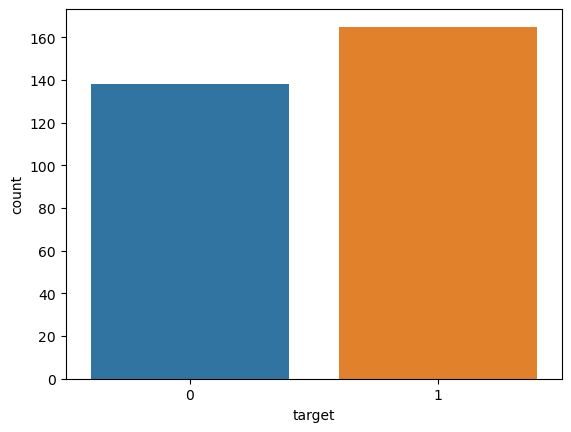

In [13]:
# y=data["target"]
sns.countplot(x="target",data=data)
target_temp=data["target"].value_counts()
print(target_temp)

In [14]:
print("Percentage of patience with heart probler: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of Patience without heart problem: "+str(round(target_temp[1]*100/303,2)))

#Alternative
# print("Percentage of patience with heart probler: "+str(round(target_temp[0]*100/303)))
# print("Percentage of Patience without heart problem: "+str(round(target_temp[1]*100/303)))


Percentage of patience with heart probler: 45.54
Percentage of Patience without heart problem: 54.46


### Analysis of Features

#### Analysing the"sex" feature

In [15]:
data["sex"].unique()

array([1, 0], dtype=int64)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


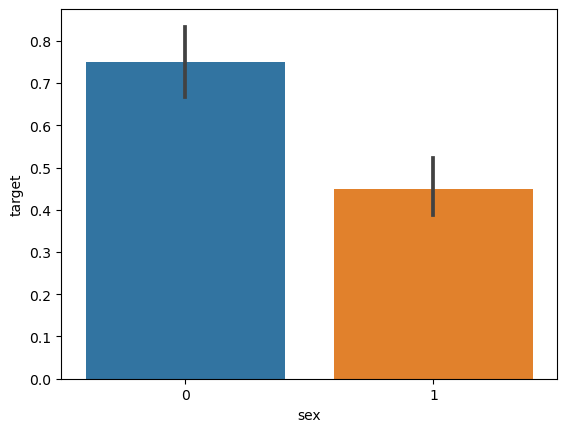

In [16]:
print(data.columns)
# We notice, that as expected, the 'sex' feature has 2 unique features
sns.barplot(x=data["sex"],y=data["target"])
plt.show()
# We notice, that females are more likely to have heart problems than males

#### Analysis of Chest pain

In [17]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

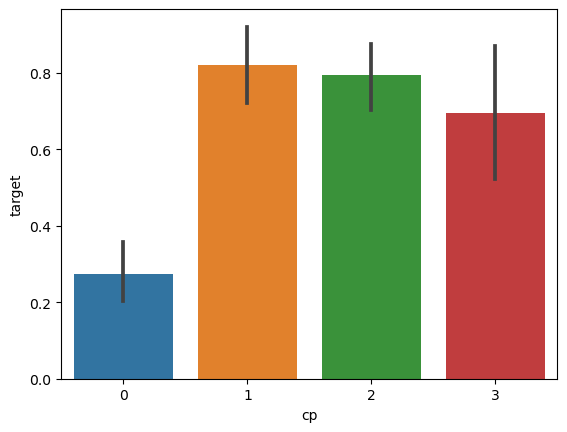

In [18]:
#hear as experted the cp features has from 0-3
sns.barplot(x=data["cp"],y=data["target"])

In [19]:
data["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [20]:
data["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

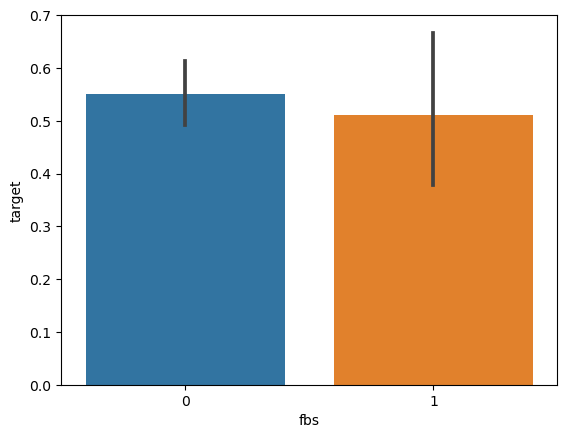

In [21]:
sns.barplot(x=data["fbs"],y=data["target"])

In [22]:
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

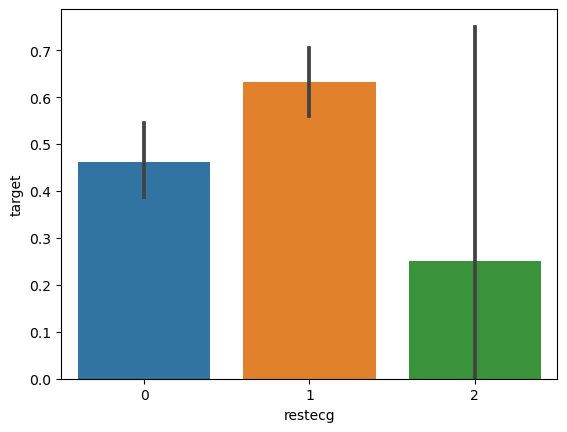

In [23]:
sns.barplot(x=data["restecg"],y=data["target"])

In [24]:
data["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

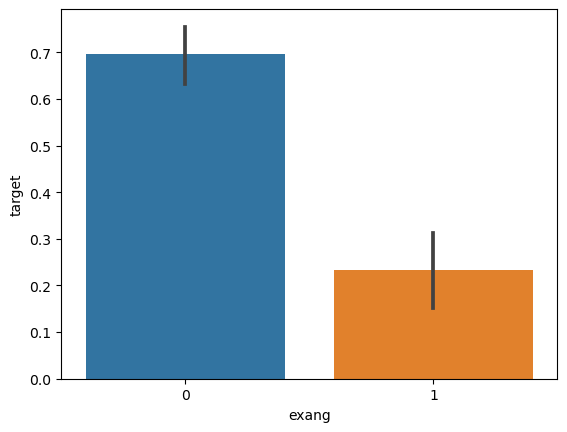

In [25]:
sns.barplot(x=data["exang"],y=data["target"])

In [26]:
data["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

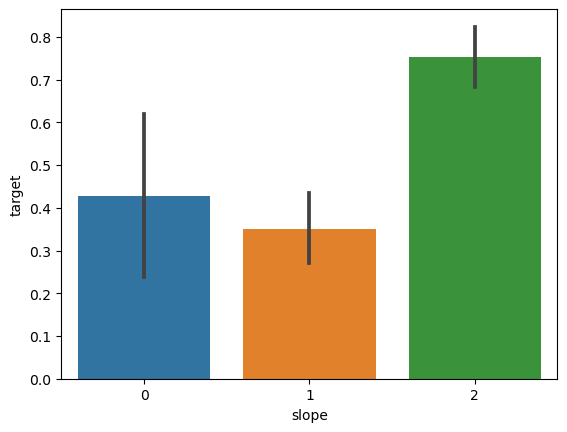

In [27]:
sns.barplot(x=data["slope"],y=data["target"])

In [28]:
data["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='count'>

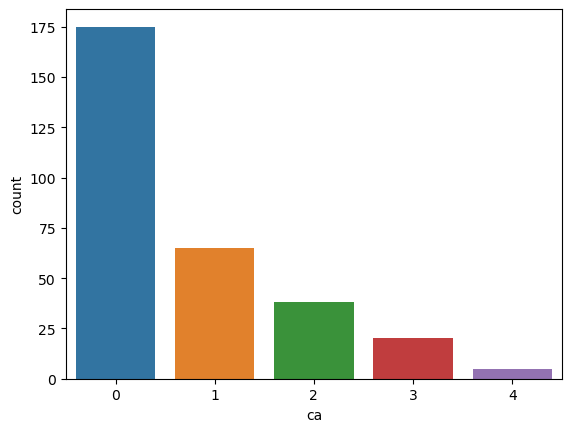

In [29]:
sns.countplot(x=data["ca"])

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


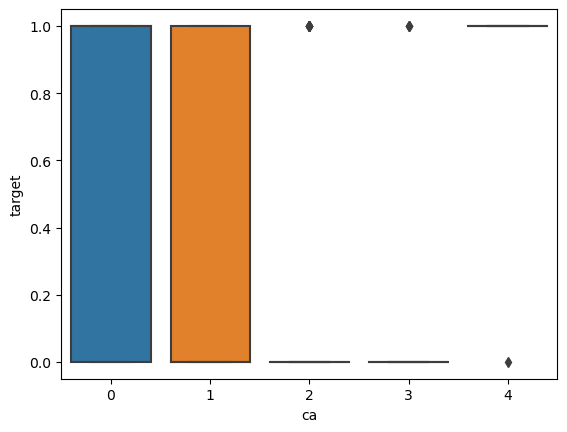

In [30]:
sns.boxplot(x=data["ca"],y=data["target"])
print(data.columns)

In [31]:
# data["thal"].unique

In [32]:
# sns.barplot(x=["thal"],y=["fbs"])

<Axes: xlabel='thal', ylabel='Density'>

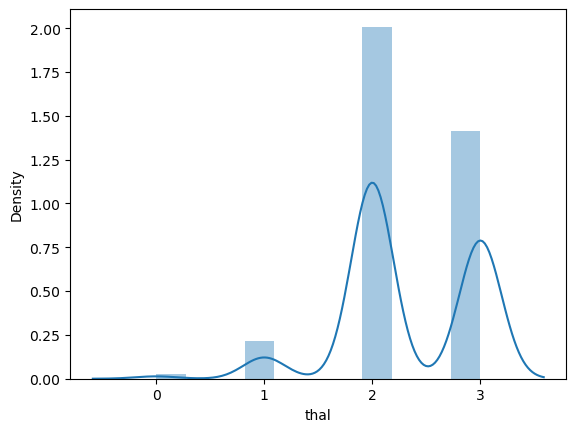

In [33]:
sns.distplot(data["thal"])

### train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x=data.drop("target",axis=1)

In [36]:
y=data["target"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [38]:
x_train.shape

(242, 13)

In [39]:
x_test.shape

(61, 13)

In [40]:
y_test.shape

(61,)

In [41]:
y_train.shape

(242,)

### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

LogisticRegression()

In [45]:
prediction=lr.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
score_lr = round(accuracy_score(prediction,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.89 %


In [48]:
from sklearn.metrics import classification_report

In [49]:
LogisticRegression=print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_test,prediction))

[[24  7]
 [ 1 29]]


In [52]:
54/61*100

88.52459016393442

### Navie Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
NB=GaussianNB()

In [55]:
NB.fit(x_test,y_test)

GaussianNB()

In [56]:
nb_predict=NB.predict(x_test)

In [57]:
nb_predict.shape

(61,)

In [58]:
NavieBayes=print(classification_report(nb_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83        41
           1       0.63      0.95      0.76        20

    accuracy                           0.80        61
   macro avg       0.80      0.84      0.80        61
weighted avg       0.86      0.80      0.81        61



In [59]:
print(confusion_matrix(nb_predict,y_test))

[[30 11]
 [ 1 19]]


In [60]:
55/61*100

90.1639344262295

### SVM

In [61]:
from sklearn import svm

In [62]:
SVM=svm.SVC(kernel="linear") #A linear kernal means that the desision boundry between classes will be a straight line

In [63]:
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [64]:
SVM_predict=SVM.predict(x_test)

In [65]:
SVM_predict.shape

(61,)

In [66]:
SVM=print(classification_report(SVM_predict,y_test))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.93      0.78      0.85        36

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.83        61
weighted avg       0.85      0.84      0.84        61



In [67]:
print(confusion_matrix(SVM_predict,y_test))

[[23  2]
 [ 8 28]]


In [68]:
53/61*100

86.88524590163934

### K Nearest Neighbors

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier(n_neighbors=7)

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [72]:
knn_predict=knn.predict(x_test)

In [73]:
knn_predict.shape

(61,)

In [74]:
print(confusion_matrix(y_test,knn_predict))

[[17 14]
 [ 9 21]]


In [75]:
43/61*100

70.49180327868852

In [76]:
KNearestNeighbors=print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        31
           1       0.60      0.70      0.65        30

    accuracy                           0.62        61
   macro avg       0.63      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61



### Desision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtc=DecisionTreeClassifier()

In [79]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
dtc_predict=dtc.predict(x_test)

In [81]:
print(confusion_matrix(dtc_predict,y_test))

[[23  2]
 [ 8 28]]


In [82]:
52/61*100

85.24590163934425

In [83]:
DesisionTree=print(classification_report(dtc_predict,y_test))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.93      0.78      0.85        36

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.83        61
weighted avg       0.85      0.84      0.84        61



### Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
RFC=RandomForestClassifier()

In [86]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [87]:
RFC_predict=RFC.predict(x_test)

In [88]:
RandomForestClassifier=print(classification_report(y_test,RFC_predict))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [89]:
print(confusion_matrix(y_test,RFC_predict))

[[23  8]
 [ 2 28]]


In [90]:
53/61*100

86.88524590163934

In [91]:
from keras.models import Sequential
from keras.layers import Dense

In [92]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense

In [94]:
history=model.fit(x_train,y_train,epochs=300,batch_size=100,shuffle=1,validation_data=(x_test,y_test))

Epoch 1/300


3/3 [==============================] - 1s 115ms/step - loss: 57.6955 - accuracy: 0.5579 - val_loss: 60.1220 - val_accuracy: 0.4918
Epoch 2/300
3/3 [==============================] - 0s 20ms/step - loss: 54.8156 - accuracy: 0.5579 - val_loss: 57.0475 - val_accuracy: 0.4918
Epoch 3/300
3/3 [==============================] - 0s 21ms/step - loss: 52.0246 - accuracy: 0.5579 - val_loss: 53.9634 - val_accuracy: 0.4918
Epoch 4/300
3/3 [==============================] - 0s 33ms/step - loss: 49.2097 - accuracy: 0.5579 - val_loss: 50.8805 - val_accuracy: 0.4918
Epoch 5/300
3/3 [==============================] - 0s 23ms/step - loss: 46.3958 - accuracy: 0.5579 - val_loss: 47.7950 - val_accuracy: 0.4918
Epoch 6/300
3/3 [==============================] - 0s 23ms/step - loss: 43.6202 - accuracy: 0.5579 - val_loss: 44.7111 - val_accuracy: 0.4918
Epoch 7/300
3/3 [==============================] - 0s 22ms/step - loss: 40.7633 - accuracy: 0.5579 - val_loss: 41.6565 - val_accuracy: 0.4918
Epo

3/3 [==============================] - 0s 33ms/step - loss: 2.9158 - accuracy: 0.4959 - val_loss: 2.0817 - val_accuracy: 0.4918
Epoch 56/300
3/3 [==============================] - 0s 18ms/step - loss: 2.8716 - accuracy: 0.4876 - val_loss: 2.0434 - val_accuracy: 0.4918
Epoch 57/300
3/3 [==============================] - 0s 22ms/step - loss: 2.8260 - accuracy: 0.4876 - val_loss: 2.0158 - val_accuracy: 0.4754
Epoch 58/300
3/3 [==============================] - 0s 22ms/step - loss: 2.7792 - accuracy: 0.4959 - val_loss: 1.9752 - val_accuracy: 0.4918
Epoch 59/300
3/3 [==============================] - 0s 24ms/step - loss: 2.7384 - accuracy: 0.4917 - val_loss: 1.9301 - val_accuracy: 0.4918
Epoch 60/300
3/3 [==============================] - 0s 20ms/step - loss: 2.6931 - accuracy: 0.4917 - val_loss: 1.8928 - val_accuracy: 0.5082
Epoch 61/300
3/3 [==============================] - 0s 20ms/step - loss: 2.6486 - accuracy: 0.4959 - val_loss: 1.8590 - val_accuracy: 0.5082
Epoch 62/300
3/3 [========

3/3 [==============================] - 0s 20ms/step - loss: 1.0768 - accuracy: 0.6446 - val_loss: 0.7720 - val_accuracy: 0.7213
Epoch 114/300
3/3 [==============================] - 0s 19ms/step - loss: 1.0651 - accuracy: 0.6446 - val_loss: 0.7656 - val_accuracy: 0.7213
Epoch 115/300
3/3 [==============================] - 0s 20ms/step - loss: 1.0518 - accuracy: 0.6364 - val_loss: 0.7582 - val_accuracy: 0.7213
Epoch 116/300
3/3 [==============================] - 0s 20ms/step - loss: 1.0383 - accuracy: 0.6405 - val_loss: 0.7501 - val_accuracy: 0.7049
Epoch 117/300
3/3 [==============================] - 0s 21ms/step - loss: 1.0198 - accuracy: 0.6405 - val_loss: 0.7456 - val_accuracy: 0.7213
Epoch 118/300
3/3 [==============================] - 0s 20ms/step - loss: 1.0105 - accuracy: 0.6570 - val_loss: 0.7430 - val_accuracy: 0.7213
Epoch 119/300
3/3 [==============================] - 0s 20ms/step - loss: 0.9938 - accuracy: 0.6529 - val_loss: 0.7323 - val_accuracy: 0.7213
Epoch 120/300
3/3 [=

Epoch 171/300
3/3 [==============================] - 0s 21ms/step - loss: 0.6301 - accuracy: 0.7273 - val_loss: 0.5880 - val_accuracy: 0.7213
Epoch 172/300
3/3 [==============================] - 0s 21ms/step - loss: 0.6264 - accuracy: 0.7273 - val_loss: 0.5817 - val_accuracy: 0.7213
Epoch 173/300
3/3 [==============================] - 0s 20ms/step - loss: 0.6217 - accuracy: 0.7231 - val_loss: 0.5772 - val_accuracy: 0.7049
Epoch 174/300
3/3 [==============================] - 0s 21ms/step - loss: 0.6173 - accuracy: 0.7149 - val_loss: 0.5687 - val_accuracy: 0.7213
Epoch 175/300
3/3 [==============================] - 0s 20ms/step - loss: 0.6146 - accuracy: 0.7066 - val_loss: 0.5677 - val_accuracy: 0.7213
Epoch 176/300
3/3 [==============================] - 0s 22ms/step - loss: 0.6106 - accuracy: 0.7149 - val_loss: 0.5678 - val_accuracy: 0.7049
Epoch 177/300
3/3 [==============================] - 0s 21ms/step - loss: 0.6069 - accuracy: 0.7231 - val_loss: 0.5663 - val_accuracy: 0.7049
Epoch 

Epoch 229/300
3/3 [==============================] - 0s 22ms/step - loss: 0.4884 - accuracy: 0.7893 - val_loss: 0.5150 - val_accuracy: 0.7541
Epoch 230/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4871 - accuracy: 0.7851 - val_loss: 0.4809 - val_accuracy: 0.7377
Epoch 231/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4880 - accuracy: 0.7603 - val_loss: 0.4788 - val_accuracy: 0.7377
Epoch 232/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4748 - accuracy: 0.7645 - val_loss: 0.5005 - val_accuracy: 0.7213
Epoch 233/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4800 - accuracy: 0.7934 - val_loss: 0.4950 - val_accuracy: 0.7377
Epoch 234/300
3/3 [==============================] - 0s 22ms/step - loss: 0.4871 - accuracy: 0.7727 - val_loss: 0.4750 - val_accuracy: 0.7377
Epoch 235/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4731 - accuracy: 0.7645 - val_loss: 0.4871 - val_accuracy: 0.7377
Epoch 

Epoch 287/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4248 - accuracy: 0.8140 - val_loss: 0.4383 - val_accuracy: 0.7377
Epoch 288/300
3/3 [==============================] - 0s 23ms/step - loss: 0.4218 - accuracy: 0.8017 - val_loss: 0.4304 - val_accuracy: 0.7377
Epoch 289/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4239 - accuracy: 0.7893 - val_loss: 0.4334 - val_accuracy: 0.7213
Epoch 290/300
3/3 [==============================] - 0s 22ms/step - loss: 0.4225 - accuracy: 0.8017 - val_loss: 0.4451 - val_accuracy: 0.7377
Epoch 291/300
3/3 [==============================] - 0s 22ms/step - loss: 0.4221 - accuracy: 0.8140 - val_loss: 0.4337 - val_accuracy: 0.7377
Epoch 292/300
3/3 [==============================] - 0s 21ms/step - loss: 0.4204 - accuracy: 0.8099 - val_loss: 0.4287 - val_accuracy: 0.7377
Epoch 293/300
3/3 [==============================] - 0s 20ms/step - loss: 0.4210 - accuracy: 0.7934 - val_loss: 0.4334 - val_accuracy: 0.7377
Epoch 

In [95]:
history.history

{'loss': [57.69547653198242,
  54.815582275390625,
  52.02457809448242,
  49.20966720581055,
  46.39584732055664,
  43.62018966674805,
  40.763343811035156,
  37.93818283081055,
  35.271690368652344,
  32.47647476196289,
  29.7303409576416,
  26.88694190979004,
  24.116687774658203,
  21.431385040283203,
  18.675159454345703,
  15.845008850097656,
  13.077425003051758,
  10.366594314575195,
  7.755609035491943,
  5.682969093322754,
  4.557116508483887,
  4.561690330505371,
  4.956796169281006,
  5.154651641845703,
  5.006396293640137,
  4.701672554016113,
  4.365049362182617,
  4.117919445037842,
  4.085266590118408,
  4.099628448486328,
  4.082836151123047,
  4.02461051940918,
  3.9486405849456787,
  3.8907594680786133,
  3.8256990909576416,
  3.7897732257843018,
  3.7495276927948,
  3.7078588008880615,
  3.656934976577759,
  3.6077513694763184,
  3.5615639686584473,
  3.519692897796631,
  3.475870370864868,
  3.423062324523926,
  3.3725733757019043,
  3.337421178817749,
  3.291205883

<Axes: >

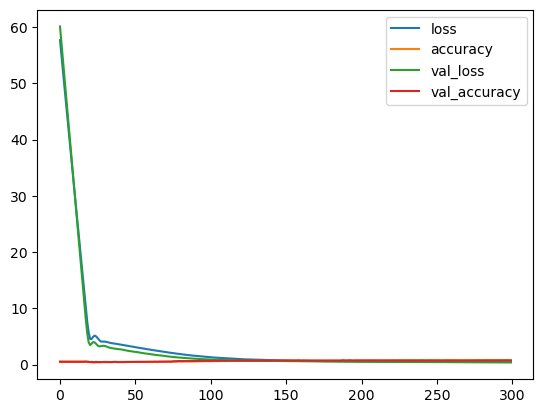

In [96]:
model_data=pd.DataFrame(history.history)
model_data.plot()

In [97]:
predict_nn=model.predict(x_test)

2/2 [==============================] - 0s 17ms/step


In [98]:
rounded = [round(x[0]) for x in predict_nn]

Y_pred_nn = rounded

In [99]:
score_nn = round(accuracy_score(Y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn),"%")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 73.77 %


In [102]:
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier

# Creating some example data
x, y = make_classification()

# Creating individual models
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()

# Creating a voting classifier
voting = VotingClassifier(estimators=[('dt', model1), ('lr', model2)])

# Traing the voting classifier
voting.fit(x, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())])

In [103]:
# Save the model

filename = "trained_model.pkl"
pickle.dump(voting, open(filename, "wb"))

<IPython.core.display.Javascript object>

In [111]:
loaded_model=pickle.load(open("trained_model.pkl","rb"))

<IPython.core.display.Javascript object>

In [112]:
# from joblib import load
import joblib
filename="heart_model.sav"
joblib.dump(voting,filename)

['heart_model.sav']